# `pysynphot2d` Demo

This notebook is a demonstration of the `pysynphot2d` wrapper which vectorizes the functionality of `pysynphot` so that it supports 2D spectra.

In [38]:
%matplotlib inline
import numpy as np
import pysynphot as ps
import matplotlib.pyplot as plt
from pysynphot2d import psp2d

## `ArraySpectrum` to `ArraySpectra`

Just pass a 1D wavelength array and 2D flux array to `psp2d.ArraySpectra` as you would pass a 1D flux array to `pysynphot.ArraySpectrum`.

Here's a simple example with some toy data:

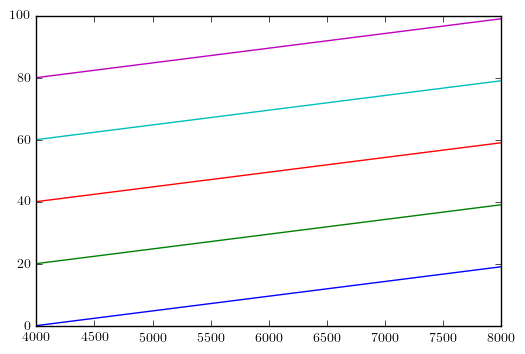

In [30]:
# Dummy data
wave = np.linspace(4000,8000,20)
flux = np.arange(100).reshape(5,20)
toy2D = psp2d.ArraySpectra(wave, flux)

# Take a look
for spec in toy2D.spectra:
    plt.plot(spec.wave, spec.flux)

Now let's do some method calls as we would for a `pysynphot.ArraySpectrum` object.

In [33]:
# Sample each spectrum at the given wavelength
sampled_spectra = toy2D.sample(12345)
print('Samples:',sampled_spectra)

Samples: [ 19.  39.  59.  79.  99.]


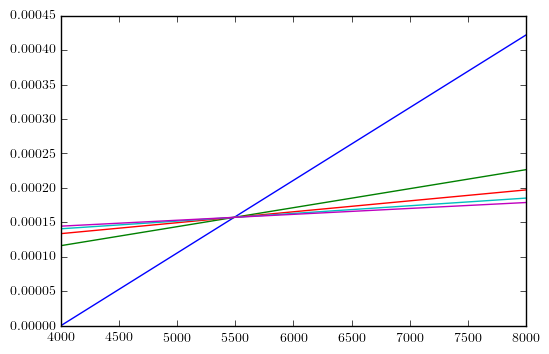

In [37]:
# Renormalize each spectrum to the given magnitude
V_band = ps.ObsBandpass('johnson,v')
renormed_spectra = toy2D.renorm(17, 'vegamag', V_band)

# Take a look
for spec in renormed_spectra:
    plt.plot(spec.wave, spec.flux)

That's it! Try your favorite `pysynphot` methods on your new `psp2d.ArraySpectra` objects (and let me know if it breaks!).

## `Observation` to `Observations`

Just pass your `psp2d.ArraySpectra` object to `psp2d.Observations` along with a `pysynphot.ObsBandpass` as you would pass `pysynphot.ArraySpectrum` to `pysynphot.Observation`:

(/grp/hst/cdbs/comp/nonhst/johnson_v_004_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(/grp/hst/cdbs/comp/nonhst/johnson_v_004_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(/grp/hst/cdbs/comp/nonhst/johnson_v_004_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(/grp/hst/cdbs/comp/nonhst/johnson_v_004_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(/grp/hst/cdbs/comp/nonhst/johnson_v_004_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.


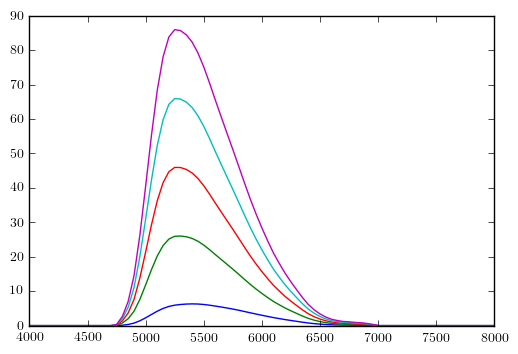

In [36]:
# Dummy observations
obs2d = psp2d.Observations(toy2D, V_band)

# Take a look
for spec in obs2d.spectra:
    plt.plot(spec.wave, spec.flux)

That's it! Enjoy and let me know when it breaks!